In [26]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import time
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img

In [27]:
# Load CIFAR-10 dataset
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()


In [28]:
# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

Defining our model

In [29]:
# Define the CNN model
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3), name='conv2d_1'),
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', name='conv2d_2'),
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', name='conv2d_3'),
    tf.keras.layers.Flatten(name='flatten'),
    tf.keras.layers.Dense(10, activation='softmax', name='output')
])

In [30]:
# compile the model
opt = tf.keras.optimizers.legacy.Adam(learning_rate=0.001)
model.compile(optimizer=opt,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [31]:
# Train the model and display the activations after each epoch
start_time = time.time()
model.fit(train_images, train_labels, epochs=1, validation_data=(test_images, test_labels))
end_time = time.time()

1563/1563 [==============================] - 32s 21ms/step - loss: 1.3847 - accuracy: 0.5092 - val_loss: 1.1444 - val_accuracy: 0.5995


In [32]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print('Test accuracy:', test_acc)
print('Time elapsed: ', end_time - start_time)

313/313 [==============================] - 2s 6ms/step - loss: 1.1444 - accuracy: 0.5995
Test accuracy: 0.5995000004768372
Time elapsed:  34.18234705924988


Image Preprocessing

In [41]:
# Define the layer you want to analyze (replace 'block4_conv1' with the desired layer name)
layer_name = 'conv2d_1'
selected_layer = model.get_layer(layer_name)

# Load and preprocess an image
image_path = 'frog.png'
image = tf.keras.preprocessing.image.load_img(image_path, target_size=(32, 32))
image = tf.keras.preprocessing.image.img_to_array(image)
image = tf.keras.applications.vgg16.preprocess_input(image)
image = np.expand_dims(image, axis=0)

# Create a sub-model that includes the selected layer
sub_model = tf.keras.models.Model(inputs=model.input, outputs=selected_layer.output)

# Get the filter weights (filter matrices) of the selected layer
filter_weights = selected_layer.get_weights()[0]

# Get the activation values (feature maps) of the selected layer
activations = sub_model.predict(image)

1/1 [==============================] - 0s 37ms/step


Visualizing Filter Matrices and Feature/Activation Maps in cconv2d_1

ValueError: num must be an integer with 1 <= num <= 16, not 17

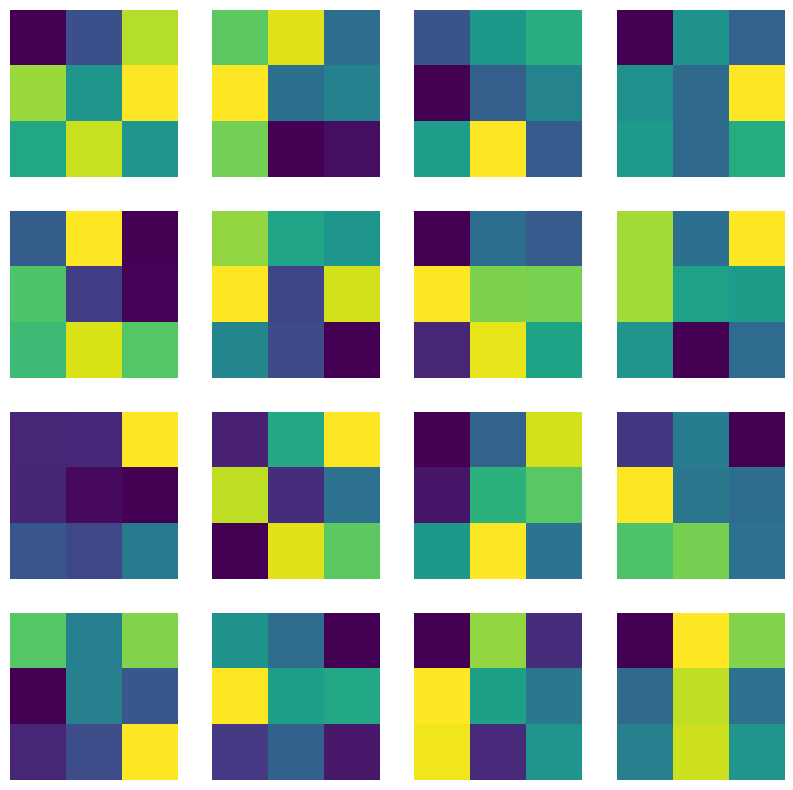

In [47]:
# Visualize filter weights
plt.figure(figsize=(8, 8))
for i in range(filter_weights.shape[3]):
    plt.subplot(4, 4, i + 1)
    plt.imshow(filter_weights[:, :, 0, i], cmap='viridis')
    plt.axis('off')
plt.suptitle('Filter Weights')
plt.show()

Visualizing Feature/Activation Maps

Visualizing Feature maps or Activation maps generated in a CNN by conv2d_1

1/1 [==============================] - 0s 29ms/step


/var/folders/b8/466710_d78q31z8wgrvw2cc00000gn/T/ipykernel_2125/4009413668.py:22: RuntimeWarning: invalid value encountered in divide
  x /= x.std ()


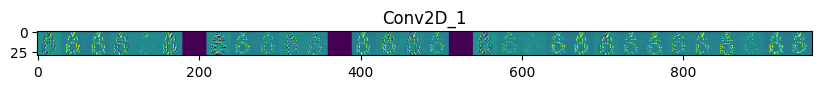

In [33]:
#Load the input image
img_path='frog.png'
img = load_img(img_path, target_size=(32, 32))
x   = img_to_array(img)                           
x = np.expand_dims(x, axis=0)
x /= 255.0

image_output = model.layers[0].output
visualization_model = tf.keras.models.Model(inputs = model.input, outputs = image_output)

firstLayer_featureMap = visualization_model.predict(x)
totalFeatures = firstLayer_featureMap.shape[-1]  # number of features in the feature map
size  = firstLayer_featureMap.shape[1]  # feature map shape (1, size, size, n_features)
  
# We will tile our images in this matrix
display_grid = np.zeros((size, size * totalFeatures))
  
# Postprocess the feature to be visually palatable
for i in range(totalFeatures):
  x  = firstLayer_featureMap[0, :, :, i]
  x -= x.mean()
  x /= x.std ()
  x *=  64
  x += 128
  x  = np.clip(x, 0, 255).astype('uint8')
  # Tile each filter into a horizontal grid
  display_grid[:, i * size : (i + 1) * size] = x
  
# Display the grid
scale = 10. / totalFeatures
plt.figure( figsize=(scale * totalFeatures, scale) )
plt.title ( 'Conv2D_1')
plt.grid  ( False )
plt.imshow( display_grid, aspect='auto', cmap='viridis' )

Visualizing Feature maps or Activation maps generated in a CNN by conv2d_2

1/1 [==============================] - 0s 43ms/step


/var/folders/b8/466710_d78q31z8wgrvw2cc00000gn/T/ipykernel_2125/1290453237.py:22: RuntimeWarning: invalid value encountered in divide
  x /= x.std ()


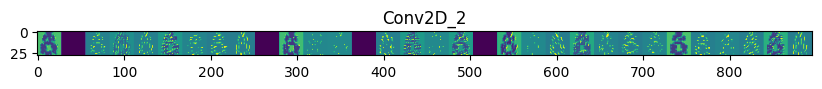

In [37]:
#Load the input image
img_path='frog.png'
img = load_img(img_path, target_size=(32, 32))
x   = img_to_array(img)                           
x = np.expand_dims(x, axis=0)
x /= 255.0

image_output = model.layers[1].output
visualization_model = tf.keras.models.Model(inputs = model.layers[0].input, outputs = image_output)

secondLayer_featureMap = visualization_model.predict(x)
totalFeatures = secondLayer_featureMap.shape[-1]  # number of features in the feature map
size  = secondLayer_featureMap.shape[1]  # feature map shape (1, size, size, n_features)
  
# We will tile our images in this matrix
display_grid = np.zeros((size, size * totalFeatures))
  
# Postprocess the feature to be visually palatable
for i in range(totalFeatures):
  x  = secondLayer_featureMap[0, :, :, i]
  x -= x.mean()
  x /= x.std ()
  x *=  64
  x += 128
  x  = np.clip(x, 0, 255).astype('uint8')
  # Tile each filter into a horizontal grid
  display_grid[:, i * size : (i + 1) * size] = x
  
# Display the grid
scale = 10. / totalFeatures
plt.figure( figsize=(scale * totalFeatures, scale) )
plt.title ( 'Conv2D_2')
plt.grid  ( False )
plt.imshow( display_grid, aspect='auto', cmap='viridis' )